# COMP809 - Lab 1, Task 2

## Question 1

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("framingham.csv");
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Question 2

In [ ]:
### Demographic ###
# sex: male or female; (Nominal)
# age: age of the patient; (Discrete) Note that the recorded ages have been truncated to whole numbers,
#      even though the concept of age is continuous.

### Behaviouralcurrent ###
# Education: education level, being 0 the lowest level (Ordinal)
# Smoker: whether or not the patient is a current smoker (Nominal)
# cigsPerDay: the number of cigarettes that the person smoked on average in one day.
#            (Discrete) Although it can be considered continuous as one can have any number of cigarretts,
#             even half a cigarette.)

### Medical( history) ###
# BPMeds: whether or not the patient was on blood pressure medication (Nominal)
# prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
# prevalentHyp: whether or not the patient was hypertensive (Nominal)
# diabetes: whether or not the patient had diabetes (Nominal)

### Medical(current) ###
# totChol: total cholesterol level (Continuous)
# sysBP: systolic blood pressure (Continuous)
# diaBP: diastolic blood pressure (Continuous)
# BMI: Body Mass Index (Continuous)
# heartRate: heart rate (Continuous) In medical research, variables such as heart rate though in fact
#                        discrete, yet are considered continuous because of large number of possible values.
# glucose: glucose level (Continuous)

### Predict variable (desired target) ###
# 10 year risk of coronary heart disease CHD (Nominal) It is binary: “1”, means “Yes”, “0” means “No”.


## Question 3

In [ ]:
print(list(df))

['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


## Question 4

In [ ]:
print("Number of observations of original data set:")
print(df.shape[0]); # dimensions of data frame

Number of observations of original data set:
4238


## Question 5

In [ ]:
print("Any NA value:", df.isnull().values.any()); # Any NA?
print(df.isnull().sum())

Any NA value: True
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


## Question 6

In [ ]:
data = df.dropna(); # eliminate
print("Number of observations in the new data set:")
print(data.shape[0]); # dimensions of data frame

Number of observations in the new data set:
3656


## Question 7

In [ ]:
# We check that the variable age is in a reasonable range
print(((data["age"] < 0) | (data["age"] >100)).values.any());

False


## Question 8

In [ ]:
print(' Minimum value total cholesterol:', np.min(data["totChol"]))
print(' Maximum value total cholesterol:', np.max(data["totChol"]))
# The maximum value is 600, which is extremely large.  It should be consulted with an expert.

 Minimum value total cholesterol: 113.0
 Maximum value total cholesterol: 600.0


## Question 9

In [ ]:
print(data.agg({"totChol":["min", "median", "skew", "std", "max"]}))

           totChol
min     113.000000
median  234.000000
skew      0.663700
std      44.096223
max     600.000000


## Question 10

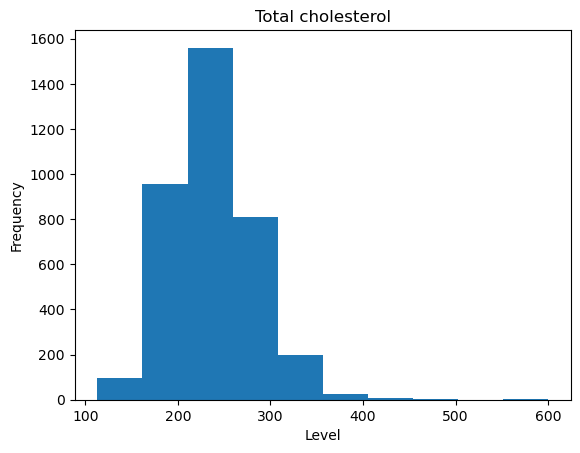

In [ ]:
plt.hist(data["totChol"], bins = 10)
plt.title("Total cholesterol")
plt.xlabel("Level")
plt.ylabel("Frequency")
plt.show()

# The distribution of the data is centred around 230, fluctuating between 110 and 600.  The distribution looks
# like right skewed.

In [ ]:
## Question 11

In [ ]:
print(data.groupby("male")["male"].count())

male
0    2034
1    1622
Name: male, dtype: int64


## Question 12

In [ ]:
print(data.groupby("male")["totChol"].mean())

male
0    239.638151
1    233.405672
Name: totChol, dtype: float64


## Question 13

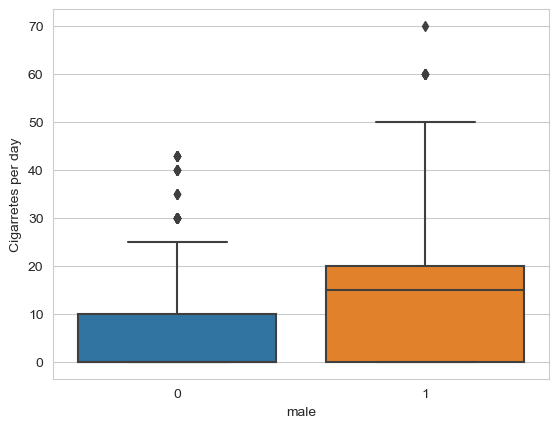

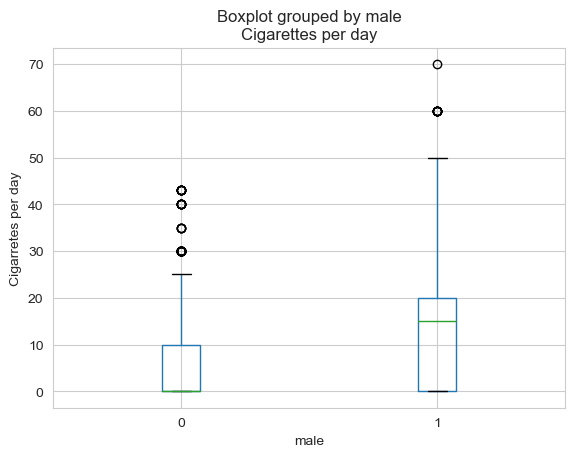

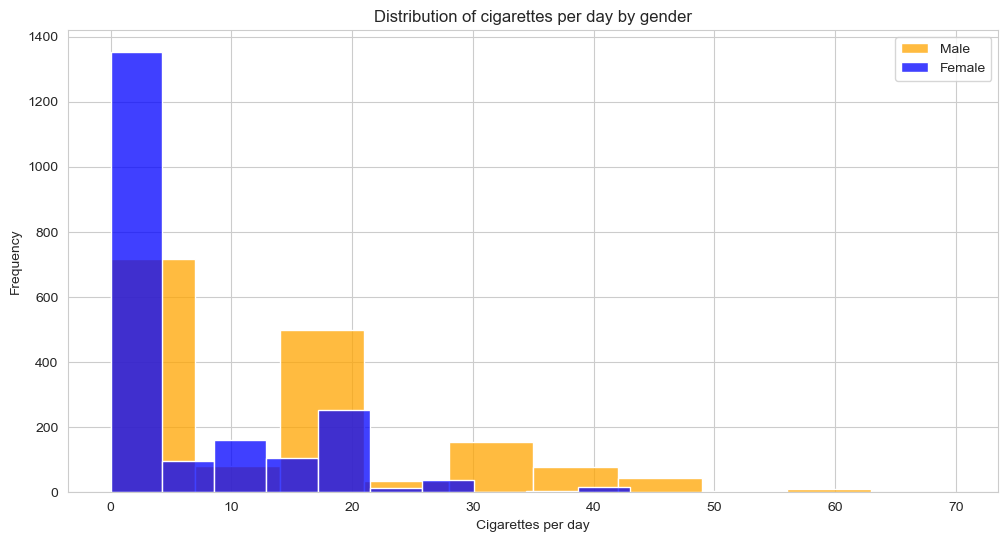

In [ ]:
import seaborn as sns
sns.set_style('whitegrid');
ax= sns.boxplot(x='male', y='cigsPerDay',data=data);
plt.ylabel("Cigarretes per day");
plt.show()

data.boxplot('cigsPerDay', by='male'); # using panda
plt.title('Cigarettes per day')
plt.ylabel("Cigarretes per day");
plt.show()

# The distribution for females is centred at a lower value, and has a lower variability.  It has a right skewed distribution,
# whereas the distribution for males is left skewed.  In this data set, the males smoke more cigarretes per day than females
# on average.



### Histograms ###
# Example of how to generate histograms:

#data.groupby('male')['cigsPerDay'].hist(bins=10,alpha=0.3) # To generate histograms per gender
#plt.xlabel('Cigarettes per Day')
#plt.ylabel('Density')
#plt.title('Distribution of Cigarettes per Day by Gender')
#plt.show()

#creating histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(data=data[data['male'] == 1], x='cigsPerDay', bins=10, color='orange', label='Male')
sns.histplot(data=data[data['male'] == 0], x='cigsPerDay', bins=10, color='blue', label='Female')
plt.xlabel('Cigarettes per day')
plt.ylabel('Frequency')
plt.title('Distribution of cigarettes per day by gender')
plt.legend()
plt.show()

# Histograms for males
# plt.hist(data[data['male']==1]['cigsPerDay'])
# plt.title('Cigarretes per day for males')
# plt.xlabel('Cigarretes per day')
# plt.ylabel('Frequency')
# plt.show()



## Question 14

In [ ]:
# Through a scatter plot.
plt.scatter(data["totChol"], data["sysBP"], color='black')
plt.xlabel("Total cholesterol")
plt.ylabel("Systolic blood pressure")
plt.show()

np.corrcoef(data["totChol"], data["sysBP"])
# It is not clear the relationship between the variables. They seem to be positive linear relationship, i.e., as the total
# cholesterol increases, the Systolic blood pressure increases as well.  However, the correlation coefficient is quite low,
# namely, o.22.



In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:
print(data.agg({"totChol":["min"]}))

     totChol
min    113.0
